<a href="https://colab.research.google.com/github/ambitama-poddar/Loss-Prevention-in-Stocks/blob/main/ARIMA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("SBI.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-01-2018,9.41,9.45,9.37,9.43,7.890946,40300
1,08-01-2018,9.41,9.47,9.41,9.41,7.874212,20100
2,09-01-2018,9.41,9.43,9.39,9.40,7.865842,45500
3,10-01-2018,9.40,9.40,9.35,9.37,7.840739,26000
4,11-01-2018,9.35,9.38,9.35,9.36,7.832373,23500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,8.838641,8.880827,8.800095,8.839523,8.125862,32773.767886
std,0.600894,0.598257,0.602535,0.600798,0.655239,36216.099330
min,7.180000,7.230000,7.130000,7.160000,6.997177,300.000000
25%,8.520000,8.560000,8.460000,8.492500,7.550000,13425.000000
50%,8.880000,8.915000,8.850000,8.890000,8.051998,22800.000000
75%,9.240000,9.280000,9.200000,9.230000,8.602436,38900.000000
max,9.950000,9.990000,9.880000,9.950000,9.504851,605200.000000


In [ ]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

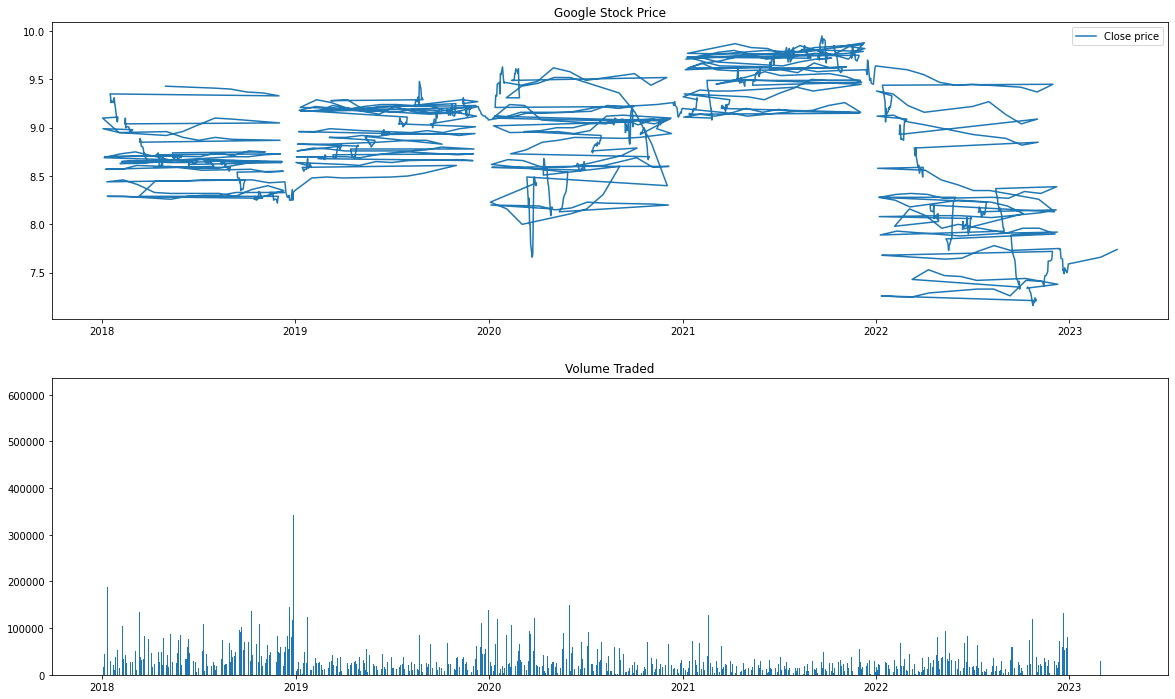

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Google Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model:-


In [ ]:
data = list(df2["Close"])

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.413699724158521
2. P-Value :  0.5756909623821345
3. Num Of Lags :  18
4. Num Of Observations Used For ADF Regression: 1239
5. Critical Values :
	 1% :  -3.435638861796935
	 5% :  -2.863875547501718
	 10% :  -2.5680134763122906


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1158 100


In [ ]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3570.630, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3569.960, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3569.744, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3569.514, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3571.294, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3570.797, Time=0.71 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.990 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1786.647
Date:                Thu, 19 Jan 2023   AIC                          -3571.294
Time:                        21:39:17   BIC                          -3566.157
Sample:                             0   HQIC                         -3569.363
    

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [ ]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:                 ARIMA(5, 2, 0)   Log Likelihood                1690.447
Date:                Thu, 19 Jan 2023   AIC                          -3368.894
Time:                        21:39:22   BIC                          -3338.080
Sample:                             0   HQIC                         -3357.312
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7961      0.015    -53.190      0.000      -0.825      -0.767
ar.L2         -0.5656      0.017    -33.798      0.000      -0.598      -0.533
ar.L3         -0.4120      0.017    -24.662      0.000      -0.445      -0.379
ar.L4         -0.2647      0.021    -12.503      0.000      -0.306      -0.223
ar.L5         -0.1517      0.017     -8.684      0.000      -0.186      -0.117
sigma2         0.0040   8.21e-05     48.297      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):              2960.67
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([8.325955  , 8.40400344, 8.38968204, 8.31939697, 8.29999158,
       8.26556889, 8.20107628, 8.09515396, 8.13567172, 8.12641953,
       8.09227959, 8.07220831, 7.9105492 , 7.92252855, 7.89301213,
       7.84749718, 7.90546597, 7.84722917, 7.87737313, 7.89348412,
       7.90697097, 7.92776631, 7.88274349, 7.78039   , 7.70653403,
       7.66242147, 7.60623974, 7.58469066, 7.53119026, 7.43606502,
       7.38671525, 7.3613272 , 7.33734684, 7.3794707 , 7.29227335,
       7.32485041, 7.43511279, 7.55896025, 7.49155261, 7.46139794,
       7.4271324 , 7.44792565, 7.40926109, 7.35391662, 7.31722822,
       7.32998748, 7.32934621, 7.28927995, 7.28191017, 7.27463966,
       7.2460098 , 7.12477772, 7.16130579, 7.18653115, 7.17523567,
       7.23798731, 7.20356975, 7.27516637, 7.26262954, 7.25509136,
       7.30817643, 7.34700623, 7.35181602, 7.25624456, 7.44690273,
       7.44468135, 7.36782802, 7.45890235, 7.49287916, 7.50497376,
       7.47921996, 7.52403606, 7.66717506, 7.65604837, 7.64278

In [ ]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2022-12-08    8.325955
2022-08-15    8.404003
2022-08-16    8.389682
2022-08-17    8.319397
2022-08-18    8.299992
                ...   
2022-12-28    7.483881
2022-12-29    7.486766
2022-12-30    7.558614
2023-03-01    7.602264
2023-04-01    7.694556
Length: 100, dtype: float64

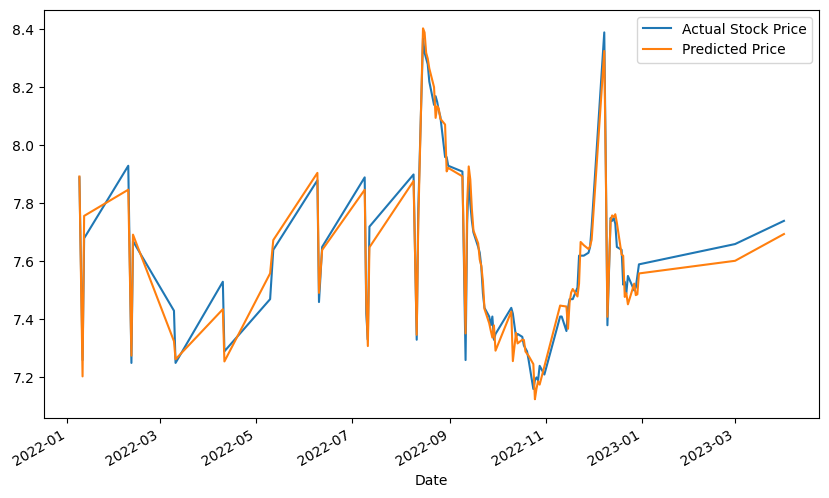

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

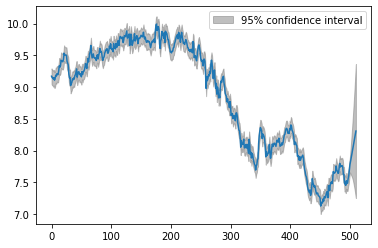

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

0.05102278110077639

In [ ]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9707465368655863

# Predicting Future 10 values:

In [ ]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([7.69455591, 7.77802822, 7.82690308, 7.87881952, 7.93227561,
       7.98791148, 8.04318253, 8.09442635, 8.14731551, 8.20051232,
       8.25395891])

In [ ]:
import datetime
start_date = datetime.datetime(2023,4,4)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [ ]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2023-04-04    7.694556
2023-04-05    7.778028
2023-04-06    7.826903
2023-04-07    7.878820
2023-04-08    7.932276
2023-04-09    7.987911
2023-04-10    8.043183
2023-04-11    8.094426
2023-04-12    8.147316
2023-04-13    8.200512
2023-04-14    8.253959
dtype: float64

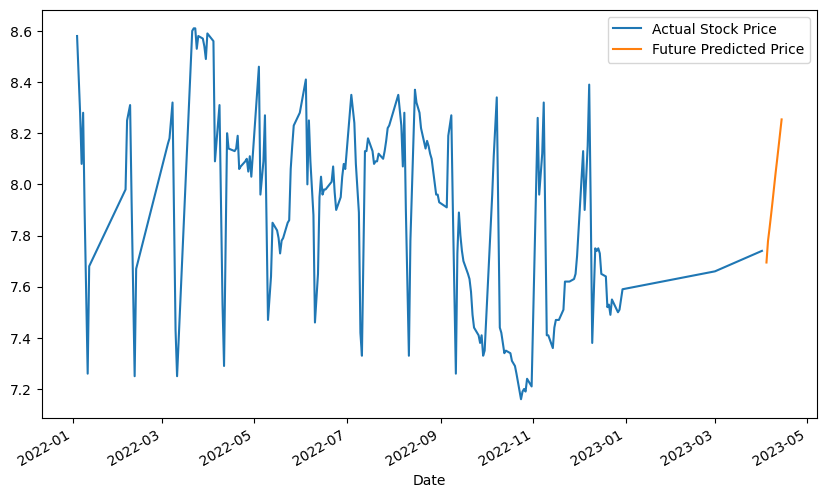

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

# Comparing predicted prices with real prices


In [ ]:
check_df = pd.read_csv("SBI.csv")

In [ ]:
check_df.Date= pd.to_datetime(check_df.Date)
check_df2 =check_df.set_index('Date')

In [ ]:
check_df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,9.41,9.45,9.37,9.43,7.890946,40300
2018-08-01,9.41,9.47,9.41,9.41,7.874212,20100
2018-09-01,9.41,9.43,9.39,9.40,7.865842,45500
2018-10-01,9.40,9.40,9.35,9.37,7.840739,26000
2018-11-01,9.35,9.38,9.35,9.36,7.832373,23500
...,...,...,...,...,...,...
2022-12-28,7.51,7.57,7.50,7.51,7.510000,68300
2022-12-29,7.48,7.61,7.48,7.55,7.550000,81000
2022-12-30,7.57,7.69,7.52,7.59,7.590000,87000


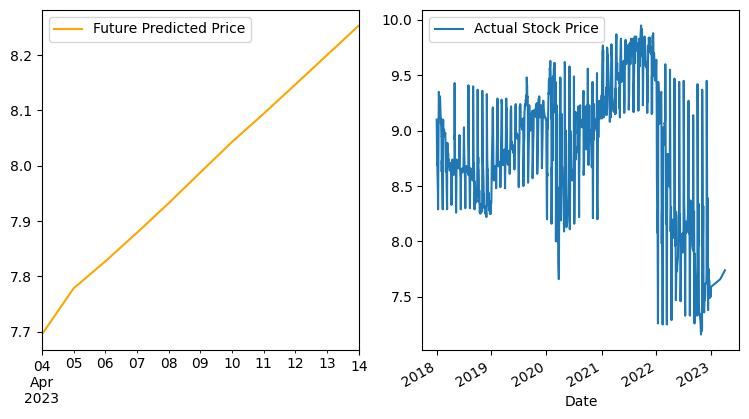

In [ ]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 2, 2)
check_df2['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()